In [1]:
#首先将用到的包进行导入
import pandas as pd
import numpy as np
import jieba
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection 
from sklearn import preprocessing

In [2]:
#将数据进行读取
data=pd.read_csv('./new_reviews_score_update.csv',index_col=0)
#现在是划分数据集
#random_state 取值，这是为了在不同环境中，保证随机数取值一致，以便验证模型的实际效果。
train_x,test_x,train_y,test_y=model_selection.train_test_split(data.评论.values.astype('U'),data.评分.values,test_size=0.2,random_state=1)
 
#划分完毕，查看数据形状
print(train_x.shape,test_x.shape)
#train_x 训练集数据 test_x 测试集数据  train_y训练集的标签 test_y 测试集的标签
t_y=test_y

(7703,) (1926,)


In [3]:
from jieba import lcut
from numpy import zeros
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, GRU, Embedding
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow import sparse
import tensorflow  as tf

In [9]:
#定义函数，从哈工大中文停用词表里面，把停用词作为列表格式保存并返回 在这里加上停用词表是因为TfidfVectorizer和CountVectorizer的函数中
#可以根据提供用词里列表进行去停用词
def get_stopwords(stop_word_file):
    with open(stop_word_file,encoding='UTF-8') as f:
        stopwords=f.read()
    stopwords_list=stopwords.split('\n')
    custom_stopwords_list=[i for i in stopwords_list]
    return custom_stopwords_list

In [10]:
stopwords=get_stopwords('./hit_stopwords.txt')
#开始使用TF-IDF进行特征的提取，对分词后的中文语句做向量化。
#引进TF-IDF的包
TF_Vec=TfidfVectorizer(max_df=0.8,
                       min_df = 3,
                       stop_words=frozenset(stopwords)
                      )
#拟合数据，将数据准转为标准形式，一般使用在训练集中
train_x_tfvec=TF_Vec.fit_transform(train_x)
#通过中心化和缩放实现标准化，一般使用在测试集中
test_x_tfvec=TF_Vec.transform(test_x)

c:\Users\a\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [11]:

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers.merge import concatenate
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
from keras.layers import Convolution1D, Flatten, Dropout, MaxPool1D, GlobalAveragePooling1D
from keras.layers import LSTM, GRU, TimeDistributed, Bidirectional
from keras.utils.np_utils import to_categorical
from keras import initializers
from keras import backend as K
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

In [12]:
#将标签转化为one-hot编码
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
train_y = encoder.fit_transform(train_y)
test_y=encoder.fit_transform(test_y)
train_x_tfvec=train_x_tfvec.toarray()
test_x_tfvec=test_x_tfvec.toarray()


In [ ]:
train_x_tfvec.shape

(7703, 55000)

In [ ]:
model = Sequential()
 
#构建Embedding层
model.add(Dense(64,input_shape=(train_x_tfvec.shape[1],),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
#模型可视化
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3520064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 3,520,259
Trainable params: 3,520,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#激活神经网络 
model.compile(optimizer = 'adam',              #adam优化器
              loss = 'categorical_crossentropy',       #二元交叉熵损失
              metrics = ['acc']                   #计算误差或准确率
              )
 
#训练
history = model.fit(train_x_tfvec, train_y, batch_size=64, epochs=10, 
                    verbose=True, validation_data=(test_x_tfvec, test_y))
 
#----------------------------------预测与可视化------------------------------
#预测
score = model.evaluate(test_x_tfvec,test_y, batch_size=64)
print('test loss:', score[0])
print('test accuracy:', score[1])

Epoch 1/10
121/121 [==============================] - 3s 21ms/step - loss: 0.9975 - acc: 0.5080 - val_loss: 0.8934 - val_acc: 0.6449
Epoch 2/10
121/121 [==============================] - 2s 19ms/step - loss: 0.7210 - acc: 0.7576 - val_loss: 0.7672 - val_acc: 0.6921
Epoch 3/10
121/121 [==============================] - 2s 18ms/step - loss: 0.4843 - acc: 0.8706 - val_loss: 0.6980 - val_acc: 0.7113
Epoch 4/10
121/121 [==============================] - 2s 18ms/step - loss: 0.3136 - acc: 0.9268 - val_loss: 0.6639 - val_acc: 0.7264
Epoch 5/10
121/121 [==============================] - 2s 18ms/step - loss: 0.2117 - acc: 0.9570 - val_loss: 0.6593 - val_acc: 0.7357
Epoch 6/10
121/121 [==============================] - 2s 18ms/step - loss: 0.1489 - acc: 0.9716 - val_loss: 0.6702 - val_acc: 0.7331
Epoch 7/10
121/121 [==============================] - 2s 18ms/step - loss: 0.1111 - acc: 0.9812 - val_loss: 0.6856 - val_acc: 0.7316
Epoch 8/10
121/121 [==============================] - 2s 18ms/step - 

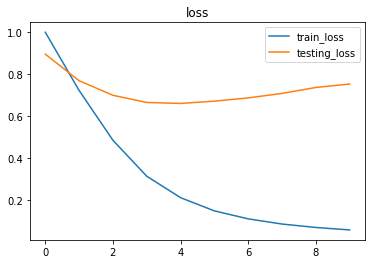

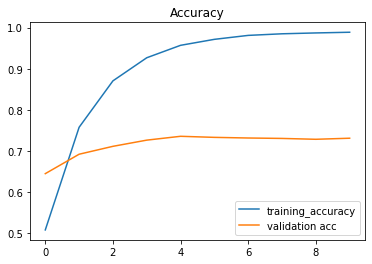

In [ ]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='training_accuracy')
plt.plot(history.history['val_acc'], label='validation acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('./model/TD-IDF+NN.h5')

In [13]:
from keras.models import load_model
model=load_model('./model/TD-IDF+NN.h5')

In [14]:
pre_y=np.argmax(model.predict(test_x_tfvec),axis=1)
test_y=t_y

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [16]:
test_accracy = accuracy_score(test_y,pre_y)
F1_score=f1_score(test_y,pre_y,average='macro')
Recall_score=recall_score(test_y,pre_y,average='macro')
Precision_score=precision_score(test_y,pre_y,average='macro')

In [17]:
print("Acc=",test_accracy)
print("Precision_score",Precision_score)
print("Recall_score",Recall_score)
print("F1_score",F1_score)

Acc= 0.731048805815161
Precision_score 0.7389869873800544
Recall_score 0.7318243186345629
F1_score 0.7347783129497875
